<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado/blob/main/Trabalho_1_%E2%80%93_Modelos_de_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados *poker-hand-testing* foi extraída de: https://archive-beta.ics.uci.edu/dataset/158/poker+hand

In [52]:
import pandas as pd
#import sklearn as sk
#import matplotlib as plt
#import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [59]:
dados = pd.read_csv("/content/drive/MyDrive/Shared/poker-hand-testing2.csv", sep = ';')
x = dados.iloc[:, :10].values # Cria uma matriz com todos os valores exceto as classes
y = dados['Class'].values     # Cria um array com os valores das classes

# Cria um dataFrame com a matriz de dados com os nomes de todas as colunas exceto a última
df_temp = pd.DataFrame(dados,columns=dados.columns[:-1])
df_temp

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,1,13,2,4,2,3,1,12
1,3,12,3,2,3,11,4,5,2,5
2,1,9,4,6,1,4,3,2,3,9
3,1,4,3,13,2,13,2,1,3,6
4,3,10,2,7,1,2,2,11,4,9
...,...,...,...,...,...,...,...,...,...,...
995,1,3,3,10,1,9,2,6,1,10
996,4,2,3,11,3,5,4,3,2,11
997,1,2,4,11,3,10,1,5,1,4
998,2,5,2,7,1,12,4,6,4,11


In [60]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
#x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

In [81]:
# KNN
KNNBestResult = 0
KNNBestPred = []
Kneighbor = 0
weight = ''
for i in range(1, 51):
  for j in ["uniform","distance"]:
    KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    opiniao = KNN.predict(x_teste)
    pred = KNN.predict(x_teste)
    result = accuracy_score(y_teste, opiniao)
    #print(f"Precisão: {i} - {j} -> ", {result})
    if result > KNNBestResult:
      KNNBestResult = result
      KNNBestPred = pred
      Kneighbor = i
      weight = j

print(f'Melhor resultado:')
print(f'kneighbor - {Kneighbor}')
print(f'weight - {weight}')
print(f'accuracy - {KNNBestResult}')
# teste = KNeighborsClassifier(n_neighbors=Kneighbor,weights=weight)
# teste.fit(x_treino,y_treino)
# opinionTest = teste.predict(x_teste)
# predTest = teste.predict(x_teste)
# resultTest = accuracy_score(y_teste, opinionTest)
# print(f'Teste com o melhor resultado: {resultTest}')

Melhor resultado:
kneighbor - 41
weight - uniform
accuracy - 0.54


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.75      0.64       254
           1       0.51      0.38      0.44       209
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1

    accuracy                           0.54       500
   macro avg       0.18      0.19      0.18       500
weighted avg       0.49      0.54      0.51       500

AUC KNN:  0.40353641456582634
AUC NB:  0.3440126050420168
AUC DT:  0.49299719887955185
AUC RF:  0.4741771708683473


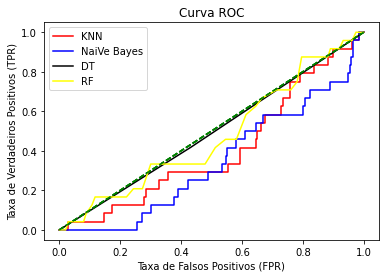

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_teste,KNNBestPred))

confusion_matrix(y_teste,KNNBestPred)
import matplotlib.pyplot as plt

from sklearn import metrics
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    #plt.show()

y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC KNN: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"red","KNN")

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_treino,y_treino)
y_score = NB.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC NB: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")

from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"black","DT")

#from sklearn.svm import SVC  
#SVM = SVC(kernel='linear') 
#SVM.fit(x, y) 

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=2)
RF.fit(x_treino,y_treino)
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"yellow","RF")

plt.show()